In [1]:
from IPython.display import Image, display, Markdown # Package to work with Jupyter notebooks
from ipywidgets import interact, FloatSlider, HBox # Widget package for adding interactivity
from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Package to manipulate array and matrix
import matplotlib.pyplot as plt # Package to create figures and plots
import math # Package to be able to do some mathematical operations
import sys  # Package to be able to import local packages
import os   # Package to interact with the operating system
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()))) # Add the current path to the system path to be able to import custom local packages
from regulabfct import ReguLabFct as rlf # Package useful for the regulation course of HELMo Gramme

# Utilisation du plan complexe des pôles et zéros (`PZMAP`) afin de déterminer la stabilité d'un système

## Représentation de `s` dans le plan complexe

L'outil PZMAP consite à déssiner les pôles et zéros d'une fonction de transfert donnée dans le plan complexe de Laplace. Comme expliqué au début de cette séance lors de l'explication de la manière de modéliser un retard, la variable de Laplace peut être décomposé en sa partie réelle et sa partie imaginaire comme suit:

$$s = \sigma + j\omega$$

où $\sigma$ représente l'`amortissement` et $\omega$ représente la `pulsation`. Voici ci-dessous la représentation de `s` dans le plan complexe :

<!DOCTYPE html><html><head><meta name="viewport" content="width=device-width, initial-scale=1"><style>img{display: block; margin-left: auto; margin-right: auto;}</style></head><body>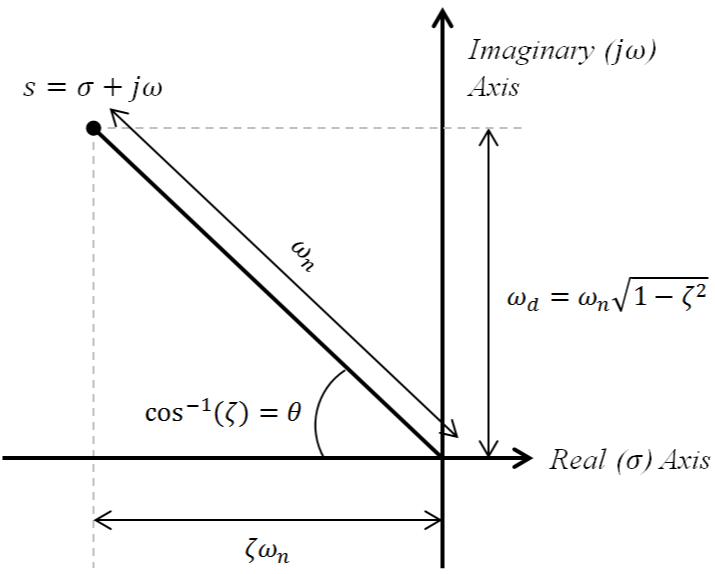</body></html>

Nous voyons qu'on peut y retrouver des paramètres d'un système du $2^{nd}$ ordre dont nous avons déjà parlés, à savoir : $\zeta$ (coefficient d'amortissement) et $\omega_n$ (pulsation naturelle). Ceux-ci peuvent être donc obtenus à partir de la valeur réel de `s` et de l'hypoténuse du triangle formée par ses 2 valeurs (réelle et imaginaire).

On peut également rencontrer un nouveeau paramètre : $\omega_d$ qui est représenté par la partie imaginaire de `s` et qui est appelé `pulsation amortie`.

>**Remarque :** Ces définitions ne sont valables que pour un système du $2^{nd}$ ordre !

## Présentation de l'outil PZMAP

Maintenant que nous savons comment se présente la variable imaginaire `s` dans le  plan complexe, nous pouvont tracer les pôles et les zéros de notre fonction de transfert. But wait ! Qu'est-ce q'un pôle et qu'est-ce qu'un zéro au fait ? 🤔

### Définitions d'un pôle et d'un zéro d'une fonction

On sait depuis la première séance qu'une fonction de transfert se présente sous la forme d'une fraction de ce type : 

$$ H(s) = \frac{N(s)}{D(s)} = \frac{a_ms^m+ ... + a_2s^2+a_1s+a_0}{b_ns^n+ ... + b_2s^2+b_1s+b_0}$$

Qui peut être récrite de la manière suivante :

$$ H(s) = K\frac{(s-z_1)(s-z_2)...(s-z^m)}{(s-p_1)(s-p_2)...(s-p^n)} = K\frac{\prod\limits_{i=1}^{m}s-z_i}{\prod\limits_{j=1}^{n}s-p_j} \qquad \boxed{Forme \; d'Evans}$$

où les **racines** du numérateurs $N(s)$ sont appelées des `zéros` et celles du dénominateur $D(s)$ des `pôles`.

### Utilisation de l'outil PZMAP sur une fonction du $1^{er}$ ordre

Voyons maintenant comment tracer ces pôles et zéros directement avec l'outil PZMAP du module `ReguLabFct` ! 

Nous allons prendre l'exemple d'un système du $1^{er}$ ordre dont la fonction de transfert est la suivante :

$$ H = \frac{s+2}{3s+4}$$

Exécuter la cellule suivante pour voir sous vos yeux se tracer ce fameux plan complexe avec nos pôles et nos zéros.

>**Note :** Le `;` à la fin de l'instruction `rlf.pzmap(H)` permet d'éviter d'afficher les valeurs retournées par défaut par la fonction `pzmap`.

In [2]:
# Definition of the transfer function
H = ml.tf([1, 2], [3, 4])
rlf.pzmap(H);

On peut observer 2 types de marqueurs, à savoir une croix et une bulle qui correspondent réciproquement au pôle et au zéro de notre fonction de transfert. En effet, la racine de notre numérateur (`zéro`) vaut bien $-2$ et celle de notre dénominateur (`pôle`) vaut bien $-\frac{4}{3}=-1.333$

## Impact de la position des pôles et du coefficient d'amortissement (zeta) sur la stabilité d'un système sur un système du $2^{nd}$ ordre

Regardons maintenant l'impact que la position de ces pôles a sur le comportement de notre système. Pour cela, nous allons partir d'un système du second ordre pour lequel vous allez pouvoir jouer sur les différents paramètres grâce à des curseurs.
> Exécutez la cellule suivante sans vous inquiéter du code.

In [3]:
import plotly.graph_objects as go

# Initial transfert function
zeta_init = 0
K_init = 1
wn_init = 1
H = ml.tf(K_init, [1/wn_init**2, 2*zeta_init/wn_init, 1]) # Transfert function

# Create the 2 interactive figures
pzmap_fig, _, _ = rlf.pzmap(H, plot=False, widget=True)
step_fig, _, _ = rlf.step(H, plot=False, data=True, widget=True)

# Function called by the slider widgets
def plot_poles_zeros(K, zeta, wn):
    H = ml.tf(K, [1/wn**2, 2*zeta/wn, 1])
    rlf.pzmap(H, fig=pzmap_fig, plot=False)
    rlf.step(H, fig=step_fig, plot=False)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_K = FloatSlider(min=-5, max=5, step=0.5, value=K_init)
slider_zeta = FloatSlider(min=-0.8, max=2, step=0.1, value=zeta_init)
slider_wn = FloatSlider(min=0.1, max=5, step=0.1, value=wn_init)
interact(plot_poles_zeros, K=slider_K ,zeta=slider_zeta, wn=slider_wn);

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([pzmap_fig, step_fig]))

interactive(children=(FloatSlider(value=1.0, description='K', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

    'data': [{'legendgroup': 'sys1',
              'legendgrouptitle': {'text': …

En jouant sur le $ \zeta $, dont nous connaissons maintenant l'impact sur un système du $2^{nd}$ ordre, nous pouvons remarquer que :

- Si $ \zeta < 0 $ ($ \Rightarrow $ Instable) : Nous avons deux **pôles complexes conjugués à partie réelle positive** ;
- Si $ \zeta = 0 $ ($ \Rightarrow $ À la limite de la stabilité) : Nous avons deux **pôles complexes conjugués à partie réelle nulle** ;
- Si $ 0 < \zeta < 1 $ ($ \Rightarrow $ Sous-amorti) : Nous avons deux **pôles complexes conjugués à partie réelle négative** ;
- Si $ \zeta = 1 $ ($ \Rightarrow $ Critiquement amorti) : Nous avons **un double pôle à partie *imaginaire* nulle** ;
- Si $ \zeta > 1 $ ($ \Rightarrow $ Sur-amorti) : Nous avons deux **pôles réels négatifs**.

> **Remarque** : Pour le cas où $ \zeta = 1 $, vous voyez deux pôles complexes conjugués et non un double pôle à partie imaginaire nulle. Cela est dû à une erreur de précision du calcul numérique, car si vous regardez l'unité de l'axe imaginaire, vous remarquerez qu'elle est en $10^{-9}$ unités ($n$ pour *nano*). Vous pouvez également vous en rendre compte en dézoomant le graphe via le bouton "-" qui apparaît au-dessus du graphe lorsque vous le survolez. Cela se vérifie mathématiquement en repartant de l'équation de la pulsation amortie (la valeur imaginaire de `s`): $ \omega_d = \omega_n\sqrt{1-\zeta^2} $, qui vaut d'office 0 à partir du moment où $ \zeta = 1 $.

## Impact de la position des pôles sur un système d'ordre quelconque

Ok, on viens donc de voir que dès qu'on a deux pôles complexes conjugués à partie réelle positive, notre système du $2^{nd}$ ordre était instable. Regardons maintenant si c'est également le cas pour un système d'ordre quelconque. Pour cela, prenons 4 système allant de l'ordre 1 à 4 tels que :

$$H_{1} = \frac{1}{s+x}$$
$$H_{2} = \frac{1}{(s+1)(s+x)}$$
$$H_{3} = \frac{1}{(s+2)(s+1)(s+x)}$$
$$H_{4} = \frac{1}{(s+3)(s+2)(s+1)(s+x)}$$

où x est une variable qui peut être modifiée grâce à un curseur.

> Exécutez la cellule suivante sans vous inquiéter du code et jouez avec la valeur de x pour observer son impact sur les réponses indicielles des différents systèmes.

In [4]:
import plotly.graph_objects as go

# Initial transfert function
x_init = 1
H_1 = ml.tf(1, [1, x_init])
H_2 = ml.tf(1, [1, 1]) * H_1
H_3 = ml.tf(1, [1, 2]) * H_2
H_4 = ml.tf(1, [1, 3]) * H_3

# Create the 2 interactive figures
pzmap_fig, _, _ = rlf.pzmap(H, plot=False, widget=True)
step_fig, _, _ = rlf.step(H, plot=False, data=True, widget=True)

# Function called by the slider widgets
def plot_poles_zeros(x):
    H_1 = ml.tf(1, [1, x])
    H_2 = ml.tf(1, [1, 1]) * H_1
    H_3 = ml.tf(1, [1, 2]) * H_2
    H_4 = ml.tf(1, [1, 3]) * H_3
    rlf.pzmap(sys_list=[H_1, H_2, H_3, H_4], sys_names=["H_1", "H_2", "H_3", "H_4"], fig=pzmap_fig, plot=False)
    rlf.step(sys_list=[H_1, H_2, H_3, H_4], sys_names=["H_1", "H_2", "H_3", "H_4"], fig=step_fig, plot=False)

# Interactive slider widgets to adjust the parameters of the transfert function
slider_x = FloatSlider(min=-5, max=5, step=0.5, value=x_init)
interact(plot_poles_zeros, x=slider_x);

# Put the 2 interactives figures in an horizontal ipywidgets.HBox
display(HBox([pzmap_fig, step_fig]))

interactive(children=(FloatSlider(value=1.0, description='x', max=5.0, min=-5.0, step=0.5), Output()), _dom_cl…

    'data': [{'legendgroup': 'H_1',
              'legendgrouptitle': {'text': '…

Afin de mieux visualiser l'impact du pôle `-x` sur les différents systèmes, vous pouvez cliquer **dans la légende** sur leurs "Poles" dans la PZMAP ou directement sur leurs noms dans la "Step response" pour les cacher/afficher.

On peut remarquer que tous nos systèmes deviennent instables ($ \Rightarrow $ divergence par rapport à la consigne qui vaut 1) à partir du moment où $ x \leq 0 $, ce qui confirme bien qu'**un système d'ordre quelconque est d'office instable dès qu'un de ses pôles est positif**.

> Retournez à présent dans la leçon sur HELMo Learn et passez à la page suivante.